# World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Deadline.** This project is due at the end of day July 17. Projects will be accepted up to 24 hours late, with a penalty of 25% deduction for every 6 hour delay, and a project submitted 24 hours or more after the deadline will receive no credit. It's **much** better to be early than late, so start working now.

**Partners.** You may work with one other partner. Only one of you is required to submit the project. Add their name to the file name with a hyphen (e.g. project1-Smith-Jones). 

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours and talk to your classmates. If you want to ask about the details of your solution to a problem, or if you're ever feeling overwhelmed or don't know how to make progresssend, send an email to the instructor or TA.

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell I provide. 

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that I use when we grade your answers. For example, in Question 1 of the Global Poverty section, I ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that my grading algorithm will give you an incorrect score. 

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!  

To get started, load `datascience`, `numpy`, and `plots` by running the next cell.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [3]:
population = Table.read_table('population.csv')
population.show(3)

geo,time,population_total
abw,"1,800","19,286"
abw,"1,801","19,286"
abw,"1,802","19,286"


**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in February, 2017.

### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [4]:
b_pop = population.where('geo', are.equal_to('bgd')).where('time', are.between_or_equal_to(1970,2015)).drop('geo')# pay attention to upper/lower case
b_pop # you can check your anwser by showing the entire table

time,population_total
"1,970","65,048,701"
"1,971","66,417,450"
"1,972","67,578,486"
"1,973","68,658,472"
"1,974","69,837,960"
"1,975","71,247,153"
"1,976","72,930,206"
"1,977","74,848,466"
"1,978","76,948,378"
"1,979","79,141,947"


Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [5]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five

time,population_total
"1,970","65,048,701"
"1,975","71,247,153"
"1,980","81,364,176"
"1,985","93,015,182"
"1,990","105,983,136"
"1,995","118,427,768"
"2,000","131,280,739"
"2,005","142,929,979"
"2,010","151,616,777"
"2,015","160,995,642"


**Question 2.** Assign `b_1970_through_2010` to a table that has the same columns as `b_five` and has one row for every five years from 1970 through 2010 (but not 2015). Then, use that table to assign `initial` to an array that contains the population for every five year interval from 1970 to 2010. Finally, assign `changed` to an array that contains the population for every five year interval from 1975 to 2015.

*Hint*: You may find the `exclude` method to be helpful ([Docs](http://data8.org/datascience/_autosummary/datascience.tables.Table.exclude.html)).

In [6]:
b_1970_through_2010 = b_five.exclude(9)
b_1970_through_2010
b_1975_through_2015 = b_five.exclude(0)
initial = b_1970_through_2010.column("population_total")
changed = b_1975_through_2015.column("population_total")
print("initial array is ")
print(initial)
print("changed array is ")
print(changed)

initial array is 
[ 65048701  71247153  81364176  93015182 105983136 118427768 131280739
 142929979 151616777]
changed array is 
[ 71247153  81364176  93015182 105983136 118427768 131280739 142929979
 151616777 160995642]


We have provided the code below that uses `b_1970_through_2010`, `initial`, and `changed` in order to add a column to the table called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://www.inferentialthinking.com/chapters/03/2/1/growth) section of the textbook.

In [7]:
b_five_growth = b_1970_through_2010.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
"1,970","65,048,701",1.84%
"1,975","71,247,153",2.69%
"1,980","81,364,176",2.71%
"1,985","93,015,182",2.64%
"1,990","105,983,136",2.25%
"1,995","118,427,768",2.08%
"2,000","131,280,739",1.71%
"2,005","142,929,979",1.19%
"2,010","151,616,777",1.21%


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [8]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [9]:
life_expectancy

geo,time,life_expectancy_years
afg,"1,800",28.21
afg,"1,801",28.2
afg,"1,802",28.19
afg,"1,803",28.18
afg,"1,804",28.17
afg,"1,805",28.16
afg,"1,806",28.15
afg,"1,807",28.14
afg,"1,808",28.13
afg,"1,809",28.12


In [10]:
child_mortality

geo,time,child_mortality_under_5_per_1000_born
afg,"1,800",468.6
afg,"1,801",468.6
afg,"1,802",468.6
afg,"1,803",468.6
afg,"1,804",468.6
afg,"1,805",468.6
afg,"1,806",470
afg,"1,807",470
afg,"1,808",470
afg,"1,809",470


In [11]:
fertility

geo,time,children_per_woman_total_fertility
afg,"1,800",7
afg,"1,801",7
afg,"1,802",7
afg,"1,803",7
afg,"1,804",7
afg,"1,805",7
afg,"1,806",7
afg,"1,807",7
afg,"1,808",7
afg,"1,809",7


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

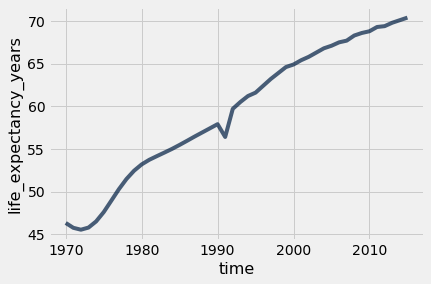

In [12]:
b_pop_life_expectancy = life_expectancy.where('geo', are.equal_to('bgd')).where('time', are.between_or_equal_to(1970,2015)).drop('geo').plot('time','life_expectancy_years')

**Question 4.** Assuming everything else stays the same, does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

If everything else remains same, the graph above does not explain why the population growth rate decreased from 1985 to 2010 in bangladesh because the life expectancy curve continues to grow over that period apart from the slight dip in 1991. The life expectancy saw a unnatural dip in 1991 which could be due to several external factors but that alone is not sufficient to explain the population growth range over the entire period.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself **The expression that draws the line plot is provided for you; please don't change it.**

In [13]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', country).drop('geo')
    country_fertility_after_start = country_fertility.where('time',are.above_or_equal_to(start))
    return country_fertility_after_start

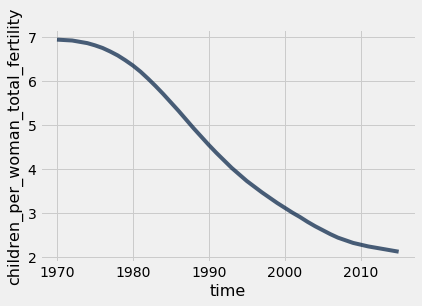

In [14]:
bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

**Question 6.** Assuming everything else stays the same, does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

This graph can be one of the factors that explains the decreased growth rate from 1985 to 2010 but cannot exlplain the full scenario. The fertility rate kept on decreasing during the period 1970-1985 but the growth rate increased and hence this factor also cannot solely determine the decrease in growth rate.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. 

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

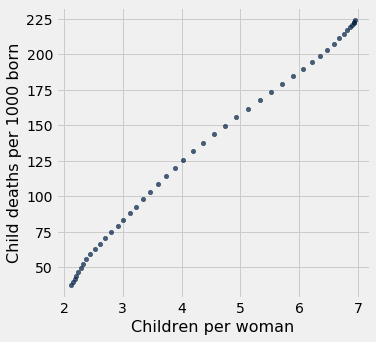

In [15]:
bgd_fertility = fertility.where('geo', are.equal_to('bgd')).where('time', are.above_or_equal_to(1970)).drop('geo').column('children_per_woman_total_fertility')
bgd_child_mortality = child_mortality.where('geo', are.equal_to('bgd')).where('time', are.above_or_equal_to(1970)).drop('geo').column('child_mortality_under_5_per_1000_born')
post_1969_fertility_and_child_mortality = Table().with_columns('Children per woman', bgd_fertility, 'Child deaths per 1000 born', bgd_child_mortality)
post_1969_fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

The scatter plot above depicts a clear association between the child mortality rate and fertility rates. As per the plot, its clear that the reduced child mortality causes parents to have fewer children.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

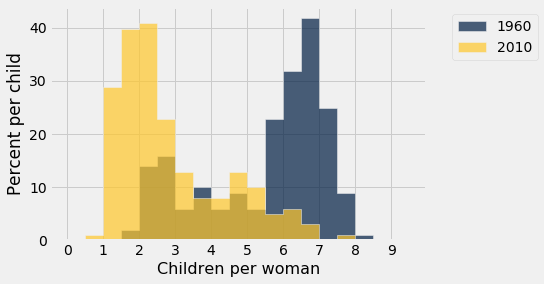

In [16]:
Table().with_columns(
    '1960', fertility.where('time', 1960).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to a list of the numbers of each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2 (inclusive).
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 (inclusive) in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [17]:
fertility_statements = [2,3,5,6]

**Question 10.** Draw a line plot of the world population from 1800 through 2005. The world population is the sum of all the country's populations. 

C:\Users\LENOVO\Anaconda3\lib\site-packages\datascience\tables.py:2870: RuntimeWarning: overflow encountered in long_scalars
  return column_fn(column)


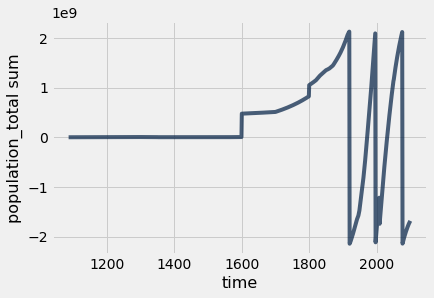

In [18]:
world_population = population.group(['time'],sum).drop('geo sum')
world_population.plot('time','population_total sum')

**Question 11.** Create a function `stats_for_year` that takes a `year` after 1959 and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2010. This restriction will speed up computations later in the project.

*Hint*: Without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works at each stage to confirm your work.

In [19]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))
fertility_of_big_50 = fertility.where('time', are.above(1959)).where('geo', are.contained_in(big_50))
child_mortality_of_big_50 = child_mortality.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time')
    f = fertility_of_big_50.where('time', year).drop('time')
    c = child_mortality_of_big_50.where('time', year).drop('time')
    
    stats = Table().with_columns('geo', p.column('geo'),
                                 'population_total',p.column('population_total'),
                                 'children_per_woman_total_fertility',f.column('children_per_woman_total_fertility'),
                                 'child_mortality_under_5_per_1000_born',c.column('child_mortality_under_5_per_1000_born'))
    return stats

Try calling your function `stats_for_year` on any year between 1960 and 2010 in the cell below.  Try to understand the output of `stats_for_year`.

In [20]:
stats_for_year(1970)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,"11,121,097",7.67,307.8
arg,"23,973,062",7.64,242.2
bgd,"65,048,701",3.07,72.4
bra,"95,982,453",6.95,224.1
can,"21,439,200",5.02,133.7
chn,"808,510,713",2.31,22
cod,"20,009,902",5.75,113.3
col,"22,061,214",5.6,97.6
deu,"78,366,605",6.21,248.1
dza,"14,550,033",5.94,242.9


**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column.  The `stats_for_year` function from the previous question may be useful here. **Warning:** test your `pop_by_year` function to make sure that it is giving you sensible output.

**Note:** The `pop_by_decade` cell is directly below the cell containing the helper function `pop_for_year`. This is where you will generate the `pop_by_decade` table!

In [21]:
def pop_for_year(year):
    population_by_year = sum(stats_for_year(year).column('population_total'))
    return population_by_year

In [22]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))
pop = decades.apply(pop_for_year, 'decade')
pop

pop_by_decade = Table().with_columns('decade', decades.column('decade'), 'population', pop)
pop_by_decade.set_format(1, NumberFormatter)
pop_by_decade.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  


decade,population
"1,960","-1,670,022,699"
"1,970","-1,083,479,878"
"1,980","-414,245,293"
"1,990","353,467,262"
"2,000","1,072,585,767"
"2,010","1,745,843,221"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [23]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
alb,Albania,europe_central_asia
dza,Algeria,middle_east_north_africa
asm,American Samoa,east_asia_pacific
and,Andorra,europe_central_asia
ago,Angola,sub_saharan_africa
aia,Anguilla,america
atg,Antigua and Barbuda,america
arg,Argentina,america


**Question 13.** Create a table called `region_counts` that has two columns, `region` and `count`. It should describe the count of how many countries in each region appear in the result of `stats_for_year(1960)`. For example, one row would have `south_asia` as its `world_6region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 1960.

In [24]:
stat = stats_for_year(1960)
stat_with_region = stat.join('geo',countries,'country').sort('child_mortality_under_5_per_1000_born', descending= True)
stat_with_region

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born,gwid,name,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,pandg,god_id,alt_5,upper_case_name,code,number,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
zaf,"17,396,367",7.29,425.5,i209,South Africa,sub_saharan_africa,upper_middle_income,coastline,g77,christian,South Africa,South Africa Republic,nan,nan,South Africa,SOUTH AFRICA,ZA,nan,SOUTH AFRICA,ZAF,710,South_Africa,nan,nan,nan,nan,nan,True,africa,-29,24
afg,"8,994,793",7.67,362.4,i1,Afghanistan,south_asia,low_income,landlocked,g77,muslim,Afghanistan,Islamic Republic of Afghanistan,nan,nan,Afghanistan,AFGHANISTAN,AF,nan,AFGHANISTAN,AFG,4,nan,nan,nan,nan,nan,nan,True,asia,33,66
nga,"45,211,614",6.35,337.3,i163,Nigeria,sub_saharan_africa,lower_middle_income,coastline,g77,nan,Nigeria,nan,nan,nan,Nigeria,NIGERIA,NG,nan,NIGERIA,NGA,566,nan,nan,nan,nan,nan,nan,True,africa,10,8
mys,"8,160,975",5.99,327.1,i134,Malaysia,east_asia_pacific,upper_middle_income,coastline,g77,muslim,Malaysia,nan,nan,nan,Malaysia,MALAYSIA,MY,nan,MALAYSIA,MYS,458,nan,nan,nan,nan,nan,nan,True,asia,2.5,112.5
dza,"11,124,892",6.63,312.8,i4,Algeria,middle_east_north_africa,upper_middle_income,coastline,g77,muslim,Algeria,nan,nan,nan,Algeria,ALGERIA,DZ,nan,ALGERIA,DZA,12,nan,nan,nan,nan,nan,nan,True,africa,28,3
cod,"15,248,246",3.99,309,i49,"Congo, Dem. Rep.",sub_saharan_africa,low_income,landlocked,g77,christian,Congo_Democratic_Republic,Congo (Democratic Republic of the),Congo Dem Rep,Democratic Republic of Congo,Democratic Republic Of The Congo (Formerly Zaire),"CONGO, DEM REP",CD,Democratic Republic Of The Congo,"CONGO, Democratic Republic of (was Zaire)",COD,180,Congo DR,"Congo, Democratic Republic of",Congo [DRC],Congo - Kinshasa,Congo [DRC],Dem. Rep. Congo,True,africa,-2.5,23.5
mmr,"21,486,424",6.6,300.8,i152,Myanmar,east_asia_pacific,low_income,coastline,g77,eastern_religions,Myanmar,Burma,Myanmar/Burma,MYANMAR (FORMERLY BURMA),Myanmar,nan,MM,Myanmar [Burma],MYANMAR,MMR,104,nan,nan,nan,nan,nan,nan,True,asia,21,96
idn,"87,792,512",6.93,300.1,i102,Indonesia,east_asia_pacific,lower_middle_income,coastline,g77,muslim,Indonesia,nan,nan,nan,Indonesia,INDONESIA,ID,nan,INDONESIA,IDN,360,nan,nan,nan,nan,nan,nan,True,asia,-5,120
egy,"27,072,397",6.88,286.4,i65,Egypt,middle_east_north_africa,lower_middle_income,coastline,g77,muslim,Egypt,"Egypt, Arab Rep.",nan,nan,nan,EGYPT,EG,nan,EGYPT,EGY,818,nan,nan,nan,nan,nan,nan,True,africa,27,30
moz,"7,493,278",6.05,276.7,i151,Mozambique,sub_saharan_africa,low_income,coastline,g77,christian,Mozambique,nan,nan,nan,Mozambique,MOZAMBIQUE,MZ,nan,MOZAMBIQUE,MOZ,508,nan,nan,nan,nan,nan,nan,True,africa,-18.25,35


In [25]:
region_counts = stat_with_region.group('world_6region').relabeled(0,'region')
region_counts

region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,10


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

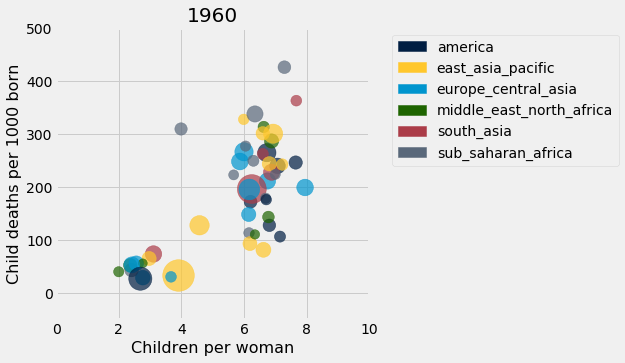

In [26]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertility_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to a list of the numbers of each statement below that can be inferred from this scatter diagram for 1960. 
1. The `europe_central_asia` region had the lowest child mortality rate.
1. The lowest child mortality rate of any country was from an `east_asian_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rate.

In [27]:
scatter_statements = [2,3,4]

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

In [28]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
Table().with_column('Year', np.arange(1960, 2016)).apply(stats_relabeled, 'Year')

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

C:\Users\LENOVO\Anaconda3\lib\site-packages\datascience\tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty


In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2018, the proportion of people living in extreme poverty was estimated to be 8%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [29]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,"1,996",0.2
alb,"2,002",0.73
alb,"2,004",0.53


**Question 1.** Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent_poverty_total year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it. 


*Hint*: You should check that the row corresponding to country code bdi has time 2006 and poverty 81.32.

In [30]:
latest_poverty = poverty.sort('time', descending = True).group('geo', first)
latest_poverty

NameError: name 'first' is not defined

In [31]:
def first(values):
    return values.item(0)

latest_poverty = poverty.sort('time', descending = True).group('geo', first)

latest_poverty.relabel(0, 'geo').relabel(1, 'time').relabel(2, 'poverty_percent') # You should *not* change this line.

geo,time,poverty_percent
ago,"2,009",43.37
alb,"2,012",0.46
arg,"2,011",1.41
arm,"2,012",1.75
aus,"2,003",1.36
aut,"2,004",0.34
aze,"2,008",0.31
bdi,"2,006",81.32
bel,"2,000",0.5
ben,"2,012",51.61


**Question 2.** Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [133]:
population

geo,time,population_total
abw,"1,800","19,286"
abw,"1,801","19,286"
abw,"1,802","19,286"
abw,"1,803","19,286"
abw,"1,804","19,286"
abw,"1,805","19,286"
abw,"1,806","19,286"
abw,"1,807","19,286"
abw,"1,808","19,286"
abw,"1,809","19,286"


In [135]:
poverty_and_pop = population.where('time', are.equal_to(2010)).column(2)
poverty_total =                                                                
recent_poverty_total = latest_poverty.where('geo',)
recent_poverty_total

geo,time,population_total
abw,"2,010","101,597"
afg,"2,010","27,962,207"
ago,"2,010","21,219,954"
aia,"2,010","15,358"
ala,"2,010","26,923"
alb,"2,010","2,901,883"
and,"2,010","84,864"
ant,"2,010","200,689"
are,"2,010","8,329,453"
arg,"2,010","41,222,875"


**Question 3.** Assuming that the `poverty_total` numbers in the `recent_poverty_total` table describe *all* people in 2010 living in extreme poverty, assign the name `poverty_percent` to the percentage of the world's 2010 population that were living in extreme poverty. You should find a number that is above the 2018 global estimate of 8%, since many country-specific poverty rates are older than 2018.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries have known poverty rates. Use the `population` table to compute the world's 2010 total population.

In [ ]:
poverty_percent = ...
poverty_percent

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [ ]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

**Question 4.** Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

In [ ]:
poverty_map = ...
poverty_map

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [121]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_column(
    'poverty_total', 2e4 * poverty_map.column('poverty_total'),
    'region', poverty_map.apply(colors.get, 'region')
)
Circle.map_table(scaled)

NameError: name 'poverty_map' is not defined

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), the largest numbers are in Asia and Africa.

**Question 5.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [ ]:
largest = ...
largest

**Question 6.** Write a function called `poverty_timeline` that takes **the name of a country** as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint*: The comments within the `poverty_timeline` function correspond to my solution, but you don't need to use them. Any way that you want to draw the plot is fine, as long as it generates the correct graph.

*Hint:* This question is long. Feel free to create cells and experiment. 

In [122]:
population

geo,time,population_total
abw,"1,800","19,286"
abw,"1,801","19,286"
abw,"1,802","19,286"
abw,"1,803","19,286"
abw,"1,804","19,286"
abw,"1,805","19,286"
abw,"1,806","19,286"
abw,"1,807","19,286"
abw,"1,808","19,286"
abw,"1,809","19,286"


In [123]:
poverty

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,"1,996",0.2
alb,"2,002",0.73
alb,"2,004",0.53
alb,"2,005",0.44
alb,"2,008",0.2
alb,"2,012",0.46
dza,"1,988",7.1
dza,"1,995",6.38
ago,"2,000",54.31
ago,"2,009",43.37


In [124]:
countries

country,gwid,name,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,pandg,god_id,alt_5,upper_case_name,code,number,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
afg,i1,Afghanistan,south_asia,low_income,landlocked,g77,muslim,Afghanistan,Islamic Republic of Afghanistan,nan,nan,Afghanistan,AFGHANISTAN,AF,nan,AFGHANISTAN,AFG,4,nan,nan,nan,nan,nan,nan,True,asia,33,66
akr_a_dhe,i2,Akrotiri and Dhekelia,europe_central_asia,nan,coastline,others,nan,Akrotiri and Dhekelia,nan,nan,nan,nan,nan,Akrotiri_Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,nan,nan
alb,i3,Albania,europe_central_asia,upper_middle_income,coastline,others,muslim,Albania,nan,nan,nan,Albania,ALBANIA,AL,nan,ALBANIA,ALB,8,nan,nan,nan,nan,nan,nan,True,europe,41,20
dza,i4,Algeria,middle_east_north_africa,upper_middle_income,coastline,g77,muslim,Algeria,nan,nan,nan,Algeria,ALGERIA,DZ,nan,ALGERIA,DZA,12,nan,nan,nan,nan,nan,nan,True,africa,28,3
asm,i5,American Samoa,east_asia_pacific,upper_middle_income,coastline,others,christian,American Samoa,nan,nan,nan,nan,nan,AS,nan,AMERICAN SAMOA,ASM,16,nan,nan,nan,nan,nan,nan,True,asia,-11.056,-171.082
and,i6,Andorra,europe_central_asia,high_income,landlocked,others,christian,Andorra,nan,nan,nan,nan,nan,AD,nan,ANDORRA,AND,20,nan,nan,nan,nan,nan,nan,True,europe,42.5078,1.52109
ago,i7,Angola,sub_saharan_africa,upper_middle_income,coastline,g77,christian,Angola,nan,nan,nan,Angola,ANGOLA,AO,nan,ANGOLA,AGO,24,nan,nan,nan,nan,nan,nan,True,africa,-12.5,18.5
aia,i8,Anguilla,america,nan,coastline,others,christian,Anguilla,nan,nan,nan,nan,nan,AI,nan,ANGUILLA,AIA,660,nan,nan,nan,nan,nan,nan,True,americas,18.2167,-63.05
atg,i9,Antigua and Barbuda,america,high_income,coastline,g77,christian,Antigua and Barbuda,nan,nan,nan,Antigua & Barbuda,nan,AG,nan,ANTIGUA AND BARBUDA,ATG,28,nan,nan,nan,nan,nan,nan,True,americas,17.05,-61.8
arg,i10,Argentina,america,upper_middle_income,coastline,g77,christian,Argentina,nan,nan,nan,Argentina,ARGENTINA,AR,nan,ARGENTINA,ARG,32,nan,nan,nan,nan,nan,nan,True,americas,-34,-64


In [ ]:
def poverty_timeline(name):
    # get geo code for country name: 
    get_geo = stat_with_region.where('name', name).column('geo').item(0)
    # get population data, extract rows for country, and restrict attention to time and population_total:
    
    # get poverty data, extract rows for country, and restrict attention to time and 
    # extreme_poverty_percent_people_below_125_a_day:
    ...
    # join the population data to the poverty table using the time variable: 
    ...
    # use the percentage and population_total columns to determine the number of people in poverty, add column to table: 
    ...
    # drop irrelevant columns and plot:
    ...

Finally, draw the timelines below to see how the world is changing. You can check your work by comparing your graphs to the ones on [gapminder.org](https://goo.gl/lPujuh).

In [ ]:
poverty_timeline('India')

In [ ]:
poverty_timeline('Nigeria')

In [ ]:
poverty_timeline('China')

In [ ]:
poverty_timeline('United States')

Although the number of people living in extreme poverty has been increasing in Nigeria and the United States, the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

**You're finished!** Congratulations on mastering data visualization and table manipulation.